In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [113]:
item_categories = pd.read_csv('data/item_categories.csv')
items = pd.read_csv('data/items.csv')
sales_train = pd.read_csv('data/sales_train.csv')
shops = pd.read_csv('data/shops.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')
test = pd.read_csv('data/test.csv')

In [114]:
item_categories = item_categories.set_index(item_categories.item_category_id).drop('item_category_id', axis=1)
items = items.set_index(items.item_id).drop('item_id', axis=1)
items['item_category_name'] = item_categories.loc[items['item_category_id'].array].item_category_name.array
shops = shops.set_index(shops.shop_id).drop('shop_id', axis=1)
sales_train['item_category_id'] = items.loc[sales_train.item_id].item_category_id.array
sales_train['total_income'] = sales_train.item_price * sales_train.item_cnt_day

In [43]:
def str_to_date(s_date):
    day, month, year = map(int, s_date.split('.'))
    return datetime.date(year, month, day)

In [117]:
date_col = sales_train.date.apply(str_to_date)

In [59]:
start_date = sorted(date_col.unique())[0]

In [118]:
sales_train['date'] = date_col

In [119]:
sales_train['days'] = sales_train['date'].apply(lambda date: (date - start_date).days)
sales_train['weeks'] = sales_train['days'].apply(lambda days: (days + start_date.weekday()) // 7)

In [97]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,total_income,days,weeks
0,2013-01-02,0,59,22154,999.00,1.0,37,999.00,1,0
1,2013-01-03,0,25,2552,899.00,1.0,58,899.00,2,0
2,2013-01-05,0,25,2552,899.00,-1.0,58,-899.00,4,0
3,2013-01-06,0,25,2554,1709.05,1.0,58,1709.05,5,0
4,2013-01-15,0,25,2555,1099.00,1.0,56,1099.00,14,1


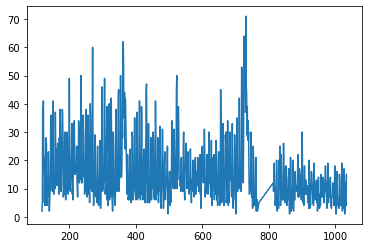

In [120]:
sub_sales_train = sales_train[(sales_train.shop_id == 28) & (sales_train.item_id == 20949)]
day_info = sub_sales_train.groupby('days').item_cnt_day.sum().sort_index()
plt.plot(day_info)
plt.show()

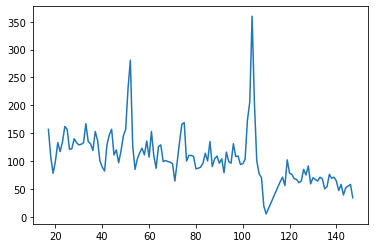

In [121]:
sub_sales_train = sales_train[(sales_train.shop_id == 28) & (sales_train.item_id == 20949)]
week_info = sub_sales_train.groupby('weeks').item_cnt_day.sum().sort_index()
plt.plot(week_info)
plt.show()

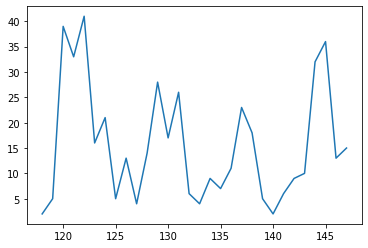

In [123]:
plt.plot(day_info[:30])
plt.show()

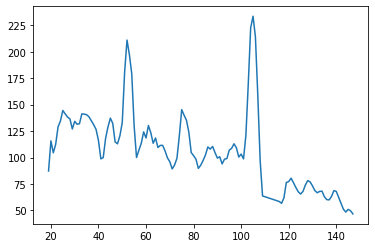

In [96]:
plt.plot(week_info.rolling(4).mean())
plt.show()

In [124]:
sales_train.sort_values(by='date', inplace=True)

In [125]:
sales_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,total_income,days,weeks
2885098,2015-10-31,33,41,21386,169.0,1.0,40,169.0,1033,147
2930981,2015-10-31,33,21,988,199.0,1.0,37,199.0,1033,147
2885097,2015-10-31,33,41,21377,169.0,1.0,40,169.0,1033,147
2930993,2015-10-31,33,22,10207,1199.0,1.0,30,1199.0,1033,147
2928850,2015-10-31,33,24,3042,3199.0,1.0,20,3199.0,1033,147


In [127]:
train_dataset = sales_train[sales_train.date < datetime.date(2015, 10, 1)]

In [128]:
train_dataset.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,total_income,days,weeks
2849816,2015-09-30,32,50,15483,549.0,1.0,63,549.0,1002,143
2849791,2015-09-30,32,50,15069,2499.0,3.0,28,7497.0,1002,143
2849769,2015-09-30,32,50,10518,399.0,1.0,55,399.0,1002,143
2849911,2015-09-30,32,50,13881,659.0,1.0,55,659.0,1002,143
2832824,2015-09-30,32,42,13339,359.0,1.0,47,359.0,1002,143


In [129]:
test_dataset = sales_train[sales_train.date >= datetime.date(2015, 10, 1)]

In [132]:
train_dataset.to_csv('data/train_dataset.csv', index=None)
test_dataset.to_csv('data/test_dataset.csv', index=None)